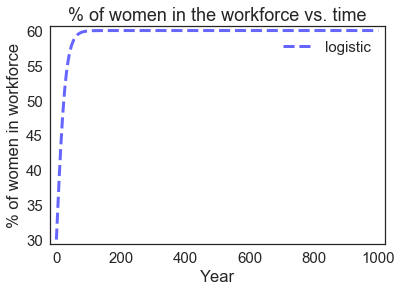

In [29]:


%matplotlib inline

from modsim import *
from pandas import *
import csv


file = open('data/data.csv')
data = csv.reader(file)

model_system = System()

#plots the sample data
def plot_data(data, new = True):
    counter = 0
    if (new):
        newfig()
    decorate(xlabel = 'time',
            ylabel = '% of women in the workforce')
    for i in data:
        if (counter > 0):
            plot(float(i[0]), float(i[1]), 'go', label='data')
        counter += 1

#plots the results as well as the sample data on a new or used graph
def plot_results(system, color = 'gray', label = 'model', title=None, new = True):
    """Plot the estimates and the model.

    system: System object with `results`
    """
    #plot_data(data, new)
    plot(system.results, '--', color = color, label = label)
    decorate(xlabel='Year', 
             ylabel='% of women in workforce',
             title=title)

#The Model's equation:
# f-rate = 0.0081x^2 - 0.8461x + 23.841
#where x is equal to the % of women in the workforce


#Runs a recursive simulation
def run_simulation(system, update_func):
    results = TimeSeries()
    results[system.t0] = system.p0
    for t in linrange(system.t0, system.t_end):
        results[t+1] = update_func(results[t], t, system)
        #print('t=', t, 'p=', results[t])
    system.results = results
    
#update function for recursive simulation
def update_func1(pop, t, system):
    new_percentage = (-0.0125*(t**2)) + (50.245 * t) -50427
    return new_percentage
    
#an alternative way of calling the previous recursive simulation
def iterative(system):
    results = TimeSeries()
    for t in linrange(system.t0, system.t_end):
        results[t] = (-0.0125*(t**2)) + (50.245 * t) -50430
    system.results = results
    
    
#a logistic simulation
def iterative_logistic(system):
    k = system.k
    r = system.r
    a = (k - system.p0) / system.p0
    results = TimeSeries()
    for t in linrange(system.t0, system.t_end):
        
        results[t] = k / (1 + a*exp(-r * (t)))
                          
    system.results = results

#initializing the system. Alpha, beta, r, and k can/should be moved to be function parameters
#alpha and beta totally aren't being used by any equations lol
system = System(t0 = 0, p0 = 30, t_end = 1000, alpha = 0.5, beta = 0.9999, k = 60, r = 0.07) #users can input values from 0.01 to 0.1


#iterative(system)
#plot_results(system, label = 'iterative', title = '% of women in the workforce vs. time', new = True)

iterative_logistic(system)
plot_results(system, color = 'blue', label = 'logistic', title = '% of women in the workforce vs. time', new = False)

